In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import toyplot
import toyplot.svg

In [27]:
df_raw = pd.read_csv("../../Raw_data/leaf_traits_measurements.csv", 
                 sep=",",
                 )

In [28]:
df_raw

,Unnamed: 0,Specimen_ID,Species,area,aspect_ratio,tooth_density,trichome_q,region,trichome_categorical,stellate_hairs_stalked,type
0,0,HUH_00266674_B3a,acutifolium,12.222,1.672787,0.000000,4.97,oaxaca,1,0,SGE
1,1,G_Martin_545_A,acutifolium,5.719,1.753189,0.000000,4.97,oaxaca,1,0,SGE
2,2,acutifolium_MD_1_Mirador_2015,acutifolium,8.574,1.872050,0.000000,4.97,oaxaca,1,0,SGE
3,3,acutifolium_G_L_Webster_17481_E,acutifolium,5.171,1.810173,0.000000,4.97,oaxaca,1,0,SGE
4,4,acutifolium_R_Hernendez_N_2418_A,acutifolium,2.038,1.918315,0.000000,4.97,oaxaca,1,0,SGE
...,...,...,...,...,...,...,...,...,...,...,...
613,652,villosum_W_Harris_9255_B_a,villosum,67.469,1.567473,0.208136,973.72,jamaica,3,1,IGE
614,653,subdentatum_DSCN8761_A_b,villosum,10.714,1.776254,0.233032,107.07,jamaica,2,0,IGE
615,654,villosum_MD_628_a,villosum,31.178,1.453971,0.246800,973.72,jamaica,3,1,IGE
616,655,subdentatum_DSCN8702_B_b,villosum,11.612,1.814996,0.263172,107.07,jamaica,2,0,IGE


In [29]:
#removing trailing spaces in names to avoid index duplication
df_raw['Species'] = df_raw['Species'].str.strip()

In [30]:
df_std = df_raw.groupby("Species").agg('std')

In [31]:
# make groups based on species and compute means
df = df_raw.groupby("Species").mean()

In [32]:
# round categorical variables to the near integer
df['trichome_categorical'] = df['trichome_categorical'].round()
df['stellate_hairs_stalked'] = df['stellate_hairs_stalked'].round()

In [33]:
#add type
df["type"] = df_raw.groupby('Species')['type'].unique().explode()

In [34]:
df.pop("Unnamed: 0")
df.columns

Index(['area', 'aspect_ratio', 'tooth_density', 'trichome_q',
       'trichome_categorical', 'stellate_hairs_stalked', 'type'],
      dtype='object')

In [35]:
# fix stellato_tomentosum separator
df.index = df.index.str.replace("stellato_tomentosum", "stellato-tomentosum")
df.index = df.index.str.replace("tinoides1", "tinoides_1")
df.index = df.index.str.replace("tinoides2", "tinoides_2")

In [36]:
# save splvl means table
df.to_csv("LAST_leaf_data_means_splvl_Jan2022.csv")

In [38]:
#copy index as column
df["Species"] = df.index

In [39]:
df

,area,aspect_ratio,tooth_density,trichome_q,trichome_categorical,stellate_hairs_stalked,type,new_name,Species
Species,,,,,,,,,
acutifolium,5.530375,1.872580,0.060924,4.970000,1.0,0.0,SGE,acutifolium,acutifolium
alpinum,37.133600,1.623345,0.000000,4.970000,1.0,0.0,IGE,alpinum,alpinum
ayavacense,24.850143,1.862640,0.176843,48.727143,1.0,0.0,IGE,ayavacense,ayavacense
blandum,14.931621,2.127044,0.088399,4.970000,1.0,0.0,SGE,blandum,blandum
caudatum,43.971167,1.322137,0.102614,4.970000,1.0,0.0,IGE,caudatum,caudatum
ciliatum,16.223000,1.471670,1.359515,4.970000,1.0,0.0,D,ciliatum,ciliatum
costaricanum,24.348308,2.262759,0.098835,4.970000,1.0,0.0,IGE,costaricanum,costaricanum
dentatum,27.971353,1.309421,1.001637,107.070000,2.0,0.0,D,dentatum,dentatum
discolor,20.730500,1.834057,0.366179,4466.340000,4.0,1.0,LPT,discolor,discolor


### Colors by regions

In [41]:
def get_regions():
    ## add regions to principalDf
    import dbgdrive
    regions = dbgdrive.get_database(sheet_name='regions', 
                                    id_spreadsheet='id', 
                                    api_key='yourkey')

    # import collections to create an empty dict
    from collections import defaultdict

    # create empty dict
    regions_imap = defaultdict(list)
    colors_imap = defaultdict(list)
    regions_list = []

    # go row by row
    for index, row in regions.iterrows():
        if row["RegionShort"] not in regions_list:
            regions_list.append(row["RegionShort"])

        if row["Species"]:
            regions_imap[row["Species"]] = row["RegionShort"]
            colors_imap[row["RegionShort"]] = row["Color"]
            


    #add some species that are mised in our online database
    # regions_imap["hondurense"] = "Chiapas/CA"
    # regions_imap["venustum"] = "CR"
    return regions_list, regions_imap, colors_imap


In [42]:
regions_list, regions_imap, colors_imap = get_regions()

In [43]:
regions_list

['Oaxaca',
 'Jam',
 'S.Ecu/N.Peru',
 'Chiapas/CA',
 'E.Mex',
 'CR',
 'out',
 'S.Peru/Bol',
 'S.Col/N.Ecu',
 'E.Col/Ven',
 'W.Mex',
 'W.Col']

In [44]:
regions_imap

defaultdict(list,
            {'acutifolium': 'Oaxaca',
             'alpinum': 'Jam',
             'ayavacense': 'S.Ecu/N.Peru',
             'blandum': 'Chiapas/CA',
             'caudatum': 'E.Mex',
             'ciliatum': 'E.Mex',
             'costaricanum': 'CR',
             'dentatum': 'out',
             'discolor': 'Chiapas/CA',
             'disjunctum': 'Chiapas/CA',
             'new_name_2': 'S.Peru/Bol',
             'elatum': 'out',
             'fuscum': 'Oaxaca',
             'hallii': 'S.Col/N.Ecu',
             'hartwegii': 'Chiapas/CA',
             'hirsutum': 'E.Mex',
             'jamesonii': 'S.Col/N.Ecu',
             'jucundum': 'Chiapas/CA',
             'lasiophyllum': 'E.Col/Ven',
             'lautum': 'Chiapas/CA',
             'loeseneri': 'W.Mex',
             'membranaceum': 'Oaxaca',
             'microcarpum': 'E.Mex',
             'microphyllum': 'Oaxaca',
             'new_sp_1': 'Oaxaca',
             'new_sp_2': 'Oaxaca',
             'obtusatu

## Check correlation between variables

In [46]:
allfeatures = ['area', 'aspect_ratio', 'tooth_density', 'trichome_q', 
               'trichome_categorical', 'stellate_hairs_stalked']
cov_data = np.corrcoef(df[allfeatures].T)

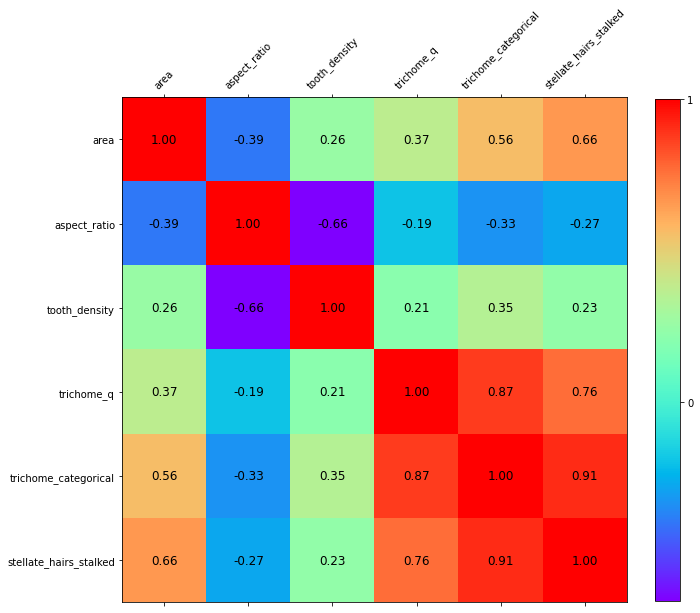

In [48]:
plt.figure(figsize=(10,10))
img = plt.matshow(cov_data, cmap=plt.cm.rainbow, fignum=1)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")

        
plt.xticks(ticks=range(0,len(allfeatures)),labels=allfeatures, rotation=45)
plt.yticks(ticks=range(0,len(allfeatures)),labels=allfeatures)
plt.show()

## PCAs

In [56]:
def plot_pcas_regions_types(principalDf, regions, pca=None, save_files=False, color_per_region=True, colored_axis=True, pos_label=(-3,3), name="Default"):
    canvas = toyplot.Canvas(width=1200, height=800)
    for idx, target_region in enumerate(regions):
#         canvas = toyplot.Canvas(width=400, height=400)
        axes = canvas.cartesian(show=False, grid=(3, 4, idx))
    
        if colored_axis:
            axes.hlines(0, color=colors_imap[target_region], style={"stroke-dasharray": 5, "stroke-width": 4})
            axes.vlines(0, color=colors_imap[target_region], style={"stroke-dasharray": 5, "stroke-width": 4})
        else:
            axes.hlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})
            axes.vlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})

        #define target region, in this pubescence will be marketd
        # target_region = "central"
        

        #plot points region by region to control colors
        for region in set(targets):
            subdf = principalDf[principalDf["regions"] == region]


            #iterate by species within regions to define colors by types
            colors = []

            for species in subdf[subdf["regions"] == region].index:
               

                #define if the point is for a target region or not
                if region == target_region:
                    if color_per_region:
                        #check if leaf type
                        lt = df.loc[df['Species'] == species]["type"].values
                
                        #define colors based on type
                        if lt == "LPT": 
                            colors.append(toyplot.color.Palette()[0]) #LPT
                        elif lt == "IGE": 
                            colors.append(toyplot.color.Palette()[1]) #IGE
                        elif lt == "SGE":
                            colors.append(toyplot.color.Palette()[2]) #SGE
                        elif lt == "D":
                            colors.append(toyplot.color.Palette()[3]) #D
                    else:
                        colors.append("black")


                    size = 6
                    style = {"stroke":"black"}
                    # style = None
                else:
                    colors.append("lightgray")
#                     marker.append("+")
                    size = 8
                    style = {"opacity": 0.5}

            mark = axes.scatterplot(subdf.iloc[:,0], #subdf['pc1'],
                                    subdf.iloc[:,1], #subdf['pc2'],
                                    color=colors,
                                    title=subdf.index,
                                    size=size,
                                    mstyle=style,
#                                     marker=markers
                                   )
            
        axes.text(pos_label[0], pos_label[1], f"{target_region}", style={"font-size":"16px"},color="black");
            
            
        
        #loadings
        if pca:
            markers_colors_dict = {"LPT": toyplot.color.Palette()[0],
                    "IGE": toyplot.color.Palette()[1],
                    "SGE": toyplot.color.Palette()[2],
                    "D": toyplot.color.Palette()[3],
                   }

            if idx == len(regions)-1:

                axes = canvas.cartesian(show=False, grid=(3, 4, idx+1))
                axes.hlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})
                axes.vlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})

                mark = axes.scatterplot(principalDf.iloc[:,0],#['pc1'],
                                    principalDf.iloc[:,1],#['pc2'],
    #                                 color="lightgray",
                                    color=[markers_colors_dict[df.loc[df['Species'] == i]["type"].values[0]] for i in principalDf.index],
                                    title=principalDf.index,
                                    size=6,
                                    mstyle={"opacity": 1.0, "stroke":"black"},
    #                                 marker=markers
                                   )

            
                coeff = np.transpose(pca.components_[0:4, :])
                n = coeff.shape[0]

                for i in range(n):
                    loading_x = coeff[i,0]
                    loading_y = coeff[i,1]
                    loading_name = df.loc[:, features].columns[i]
                    axes.plot([0, loading_x],[0, loading_y], color="black")
                    axes.text(loading_x*1.5,loading_y*1.5, loading_name, color="black", style={"font-size":"16px"})

                axes.text(-3, 3, f"Loadings", style={"font-size":"16px"},color="black");

            

    if save_files:
        # toyplot.svg.render(canvas, f"LAST_allRegions-PCAplot_newSPlvlJAN2022_onlyQuantitative.svg")
        toyplot.svg.render(canvas, f"{name}.svg")

In [57]:
from sklearn.preprocessing import StandardScaler

def do_pca(features, components=3):
    
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,['Species']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components=components)
    principalStandComponents = pca.fit_transform(x)
    principalStandDf = pd.DataFrame(data = principalStandComponents, 
                               columns = [f"pc{c}" for c in range(1, components+1)],
                               index=df["Species"].values)
    
    return pca, principalStandDf

In [58]:
def add_regions_to_pcaDF(principalStandDf):
    #create lists for targets
    targets = []


    for i in df["Species"].values:
        #correct some names to match with database
        if i == "tinoides1": i = "tinoides_1"
        if i == "tinoides2": i = "tinoides_2"
        if i == "stellato_tomentosum": i = "stellato-tomentosum"
        targets.append(regions_imap[i])



    #add new regions columns to principalDf and species to verify
    principalStandDf["regions"] = targets
    
    return principalStandDf, targets



### PCAs WITH trichome_q

In [59]:
name = "LAST_selectedFeatures_and_trichomeQ"

In [60]:
df = pd.read_csv("LAST_leaf_data_means_splvl_Jan2022.csv", sep=",")

## Dropping hirsutum and membranaceum
df = df[~(df.Species == 'hirsutum') & ~(df.Species == 'membranaceum')]

In [61]:
features = ['area', 'aspect_ratio', 'tooth_density', "trichome_q"]
pca, principalDF = do_pca(features, components=4)

In [62]:
print(pca.explained_variance_ratio_)

[0.51182517 0.24335624 0.15995312 0.08486547]


In [63]:
principalDF.to_csv(f"{name}_PCA_DF.csv")

In [64]:
principalDF, targets = add_regions_to_pcaDF(principalDF)

In [65]:
plot_pcas_regions_types(principalDF, 
                        set([i for i in targets if i != "out"]), 
                        pca=pca, 
                        color_per_region=True, 
                        colored_axis=False)

<svg class="toyplot-canvas-Canvas" height="800.0px" id="td15cdab1cc9e4315ab3170576f688336" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 1200.0 800.0" width="1200.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum ciliatum microcarpum tiliaefolium lasiophyllum tinoides_2 triphyllum acutifolium fuscum microphyllum new_sp_1 new_sp_2 sulcatum loeseneri stenocalyx new_name_2 seemenii ayavacense new_name_1 reticulatum toronis hallii jamesonii pichinchense dentatum CR costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum ciliatum microcarpum tiliaefolium lasiophyllum tinoides_2 triphyllum acutifolium fuscum microphyllum new_sp_1 new_sp_2 sulcatum loeseneri stenocalyx new_name_2 seemenii ayavacense new_name_1 reticulatum toronis hallii jamesonii pichinchense dentatum Jam costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum ciliatum microcarpum tiliaefolium lasiophyllum tinoides_2 triphyllum acutifolium fuscum microphyllum new_sp_1 new_sp_2 sulcatum loeseneri stenocalyx new_name_2 seemenii ayavacense new_name_1 reticulatum toronis hallii jamesonii pichinchense dentatum W.Col costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum ciliatum microcarpum tiliaefolium lasiophyllum tinoides_2 triphyllum acutifolium fuscum microphyllum new_sp_1 new_sp_2 sulcatum loeseneri stenocalyx new_name_2 seemenii ayavacense new_name_1 reticulatum toronis hallii jamesonii pichinchense dentatum Chiapas/CA costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum ciliatum microcarpum tiliaefolium lasiophyllum tinoides_2 triphyllum acutifolium fuscum microphyllum new_sp_1 new_sp_2 sulcatum loeseneri stenocalyx new_name_2 seemenii ayavacense new_name_1 reticulatum toronis hallii jamesonii pichinchense dentatum E.Mex costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum ciliatum microcarpum tiliaefolium lasiophyllum tinoides_2 triphyllum acutifolium fuscum microphyllum new_sp_1 new_sp_2 sulcatum loeseneri stenocalyx new_name_2 seemenii ayavacense new_name_1 reticulatum toronis hallii jamesonii pichinchense dentatum E.Col/Ven costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum ciliatum microcarpum tiliaefolium lasiophyllum tinoides_2 triphyllum acutifolium fuscum microphyllum new_sp_1 new_sp_2 sulcatum loeseneri stenocalyx new_name_2 seemenii ayavacense new_name_1 reticulatum toronis hallii jamesonii pichinchense dentatum Oaxaca costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum ciliatum microcarpum tiliaefolium lasiophyllum tinoides_2 triphyllum acutifolium fuscum microphyllum new_sp_1 new_sp_2 sulcatum loeseneri stenocalyx new_name_2 seemenii ayavacense new_name_1 reticulatum toronis hallii jamesonii pichinchense dentatum W.Mex costaricanum stellato-tomentosum alpinum villosum subsessile tinoides_1 undulatum blandum discolor disjunctum hartwegii jucundum lautum obtusatum caudatum cil

## NMDS

Reviewers suggested do a non-metric multi-dimensional scaling to find "real" groups in the data. I will do this with the MDS module in sklearn

NOTE: Reading about this method, apparently if we use euclidean distance to do the reduction, the result is "identical" to the PCA. By default sklearn uses euclidean distances.
However, this is not 100% true following the result I got, in both metric and non-metric

"A good rule of thumb: stress < 0.05 provides an excellent representation in reduced dimensions, < 0.1 is great, < 0.2 is good/ok, and stress < 0.3 provides a poor representation"

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import toyplot

In [67]:
## Define all functions

In [93]:
def unique_sp_name(name):
    """Return a unique 3 chars names for each species"""
    
    problems = ("microphyllum", "microcarpum", "tinoides_1", "tinoides_2", "stenocalyx", "stellato-tomentosum","disjunctum","discolor")
    solves = ("mph","mca","ti1","ti2","stx","stl","dju","dco")

    names = name.split("_")
    if len(names) > 1:
        return f"{names[0][0:2]}{names[-1]}"
    if names[0] in problems:
        return solves[problems.index(names[0])]
    else:
        return names[0][0:3]
    


In [69]:
def prepare_data(features, distance="euclidean"):
        # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,['Species']].values

    # Standardizing the features
    x_scaled_std = StandardScaler().fit_transform(x)
    # Another way of standarizing features (commonly found in MDS examples)
    # x_scaled_std = MinMaxScaler().fit_transform(x)
    
    
    
    from sklearn.neighbors import DistanceMetric
    
    if distance != "euclidean":
        # distance = "manhattan"
        # distance = "chebyshev"
        # distance = "minkowski"
        dist = DistanceMetric.get_metric(distance)
        x_scaled_std = dist.pairwise(x_scaled_std)
    
    return x_scaled_std

In [70]:
def find_optimal_components(x_scaled_std, save_svg=True, dissimilarity="euclidean"):
    ## Select the best n_components, The elbow of the curve is a good choice for the optimal value of n_components
    stress = []
    # Max value for n_components
    max_range = 21
    for dim in range(1, max_range):
        # Set up the MDS object
        nmds = MDS(n_components=dim, random_state=0, metric=False, dissimilarity=dissimilarity)
        # Apply nMDS
        pts = nmds.fit_transform(x_scaled_std)
        # Retrieve the stress value
        stress.append(nmds.stress_)
    # Plot stress vs. n_components    
    plt.plot(range(1, max_range), stress)
    plt.xticks(range(1, max_range, 1))
    plt.xlabel('n_components')
    plt.ylabel('stress')
    
    if save_svg:
        plt.savefig(f"{NAME}LAST_NMDS_Elbow_optimalComponents.svg")
    
    plt.show()

In [71]:
def nmds(x_scaled_std, n_components=4, seed=42, dissimilarity="euclidean"):
    seed = seed
    nmds = MDS(
        n_components=n_components,#defined using previous analysis
        metric=False, #make mds non-metric
        max_iter=5000,
        eps=1e-12,
        random_state=seed,
        n_jobs=-1, #use all cores
        n_init=10000, #run multiple times with different init values and pick the best (lowest stress) above 5000 result are quite stable
        dissimilarity=dissimilarity,
    )

    npos_std = nmds.fit_transform(x_scaled_std)
    
    print("Stress: ", nmds.stress_) 
    
    return npos_std

In [72]:
import itertools
def nmds_plot(npos_std, save_svg=True, three_dimensional=False, name="LAST_NMDS_colored_expertGroups", 
              put_names=True, alpha=1.0, 
              lims=None, rotation=None, 
              components=(0,1,2),
              legend=False):
    #plot nmds result
    categories = df.loc[:, "type"].values
    colors = {"LPT": "#66c2a3",
    "IGE": "#fa8c61",
    "SGE":  "#8c9eca",
    "D":  "#e68ac2"}
    
       
    
    if three_dimensional:
#         fig = plt.figure(figsize = (8, 8))
        ax = plt.axes(projection ="3d")
        
        for i, n in enumerate(np.unique(categories)):
            subset = npos_std[categories == n] #create a mask based on the categories to subset the nmds fit results

            xp = [row[components[0]] for row in subset]
            yp = [row[components[1]] for row in subset]
            zp = [row[components[2]] for row in subset]


            names = df.loc[:, "Species"].values[categories == n]
            for i in range(len(subset)): #plot each point + it's index as text above
                ax.scatter(xp[i],yp[i],zp[i], alpha=alpha, color=colors[n], label=n if i == 0 else "")
                if put_names: 
                    ax.text(xp[i],yp[i],zp[i],  unique_sp_name(names[i]), size=10, zorder=1) 
        
        ax.set_xlabel(f'NMDS{components[0]+1}')
        ax.set_ylabel(f'NMDS{components[1]+1}')
        ax.set_zlabel(f'NMDS{components[2]+1}')
        
        if lims:
            ax.set_xlim(lims[0], lims[1])
            ax.set_ylim(lims[2], lims[3])
            ax.set_zlim(lims[4], lims[5])
        
        if rotation:
            ax.view_init(elev=rotation[0], azim=rotation[1])
        
        if legend: 
            plt.legend(title=f"NMDS", fontsize="small")  
        plt.title("NMDS (Euclidean) 3D")
        
        if save_svg:
            plt.savefig(f"{NAME}{name}_3d.svg")
                
    else:
        for i, n in enumerate(np.unique(categories)):
            subset = npos_std[categories == n] #create a mask based on the categories to subset the nmds fit results

            xp = [row[components[0]] for row in subset]
            yp = [row[components[1]] for row in subset]
            plt.scatter(xp,yp, label=n, c=colors[n], alpha=alpha)

            names = df.loc[:, "Species"].values[categories == n]
            for i, label in enumerate(names):
                if put_names:
                    plt.annotate(unique_sp_name(label), (xp[i], yp[i]))
                final_table.at[label, "a_priori_group"] = n
        
        
               
        plt.xlabel(f'NMDS{components[0]+1}')
        plt.ylabel(f'NMDS{components[1]+1}')
        if legend: 
            plt.legend(title=f"NMDS", fontsize="small")
        plt.title("NMDS (Euclidean)")
        
        if save_svg:
            plt.savefig(f"{NAME}{name}.svg")

            
#     plt.show()
#     return ax

In [73]:
def nmds_plot_regions(npos_std, save_svg=True, 
                      three_dimensional=False, 
                      name="LAST_NMDS_colored_expertGroups_regions", 
                      put_names=True, 
                      lims=None, 
                      rotation=None,
                      components=(0,1,2),
                      size=(8, 8),
                      dot_size=150):
    
    # get regions
    regions_list, regions_imap, colors_imap = get_regions()
    # add an element with all regions
    regions_list.append(" ".join(regions_list))
    
    #plot nmds result
    categories = df.loc[:, "type"].values
    colors = {"LPT": "#66c2a3",
    "IGE": "#fa8c61",
    "SGE":  "#8c9eca",
    "D":  "#e68ac2"}
    
    
    for region in regions_list:
        if region == "out":
            continue

        fig = plt.figure(figsize = size)
        if three_dimensional:
            ax = plt.axes(projection ="3d")
        else:
            ax = plt.axes()

        for i, n in enumerate(np.unique(categories)):
            subset = npos_std[categories == n] #create a mask based on the categories to subset the nmds fit results

            xp = [row[components[0]] for row in subset]
            yp = [row[components[1]] for row in subset]
            if three_dimensional: zp = [row[components[2]] for row in subset]


            names = df.loc[:, "Species"].values[categories == n]
            for i in range(len(subset)): #plot each point + it's index as text above
    
                # define color by region
                if regions_imap[names[i]] in region:
                    color_reg = colors[n]
                    alpha = 0.8
                    zorder = 500
                    s = dot_size
                    edgecolors="black"
                else:
                    color_reg = "lightgray"
                    alpha = 0.5
                    zorder = -1
                    s = dot_size * 0.6
                    edgecolors="gray"

                if three_dimensional: 
                    to_plot = xp[i],yp[i],zp[i]
                else:
                    to_plot = xp[i],yp[i]
                    
                ax.scatter(*to_plot, 
                           alpha=alpha, 
                           s=s, 
                           color=color_reg, 
                           edgecolors=edgecolors,
                           zorder=zorder, 
                           label=n if i == 0 else "")
                if put_names: 
                    ax.text(*to_plot,  unique_sp_name(names[i]), size=10, zorder=9999)



#         ax.set_xlabel('NMDS1')
#         ax.set_ylabel('NMDS2')
#         if three_dimensional: ax.set_zlabel('NMDS3')

        if lims:
            ax.set_xlim(lims[0], lims[1])
            ax.set_ylim(lims[2], lims[3])
            if three_dimensional: ax.set_zlim(lims[4], lims[5])

        if rotation and three_dimensional:
            ax.view_init(elev=rotation[0], azim=rotation[1])

        
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
            
        if not three_dimensional:    
            ax.axhline(color = 'black', linestyle = (0, (2, 2)), lw = 4, zorder=-1)
            ax.axvline(color = 'black', linestyle = (0, (2, 2)) , lw = 4, zorder=-1)
            ax.tick_params(left=False, bottom=False)
            for pos in ['right', 'top', 'bottom', 'left']:
                ax.spines[pos].set_visible(False)
        
        suffix = ""
        if three_dimensional: 
#             ax.xaxis.pane.set_edgecolor('black')
#             ax.yaxis.pane.set_edgecolor('black')
#             ax.zaxis.pane.set_edgecolor('black')
            # Make panes transparent
            ax.xaxis.pane.fill = False
            ax.yaxis.pane.fill = False
            ax.zaxis.pane.fill = False

            # Remove grid lines
#             ax.grid(False)

            # Remove tick labels
            ax.set_zticklabels([])

            suffix = "3D"

#       plt.legend(title=f"NMDS", fontsize="small")  
        plt.title(f"{region}", loc='left', fontdict={'fontsize': 16}) 
#         plt.tight_layout()
        
        if save_svg:
            region = region.replace("/","-")
            plt.savefig(f"{NAME}{name}_{region}_{suffix}.svg")

        plt.show()


    

In [74]:
def find_optimal_k(npos_std, save_svg=True):
    #testing kmers (again elbow of the curve is ok)
    sse = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(npos_std)
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("Elbow Criterion for defining K in Euclidean")
    
    if save_svg:
        plt.savefig(f"{NAME}LAST_kmeans_Elbow_optimalK.svg")
        
    plt.show()

In [75]:
def clustering(npos_std, n_clusters=4, save_svg=True, three_dimensional=False, put_names=True, rotation=None):
    # define the model
    model = KMeans(n_clusters=n_clusters, max_iter=10000)
    # fit the model
    model.fit(npos_std)
    # assign a cluster to each example
    yhat = model.predict(npos_std)
    # retrieve unique clusters
    clusters = np.unique(yhat)
    # create scatter plot for samples from each cluster
    
    if three_dimensional:
        fig = plt.figure(figsize = (8, 8))
        ax = plt.axes(projection ="3d")

        for idcl, cluster in enumerate(clusters):
            # get row indexes for samples with this cluster
            subset = npos_std[yhat == cluster] 
            xp = [row[0] for row in subset]
            yp = [row[1] for row in subset]
            zp = [row[2] for row in subset]
            # plt.scatter(xp,yp, label=n)
            # ax.scatter(xp, yp, zp)

            names = df.loc[:, "Species"].values[yhat == cluster]
            for i, label in enumerate(names):
            #     ax.annotate(unique_sp_name(label), (xp[i], yp[i]))
                # table_clusters = table_clusters.append({"cluster": cluster, "species": label}, ignore_index=True)\
                final_table.at[label, "kmeans_nmds_euclidean"] = cluster

            for i in range(len(subset)): #plot each point + it's index as text above
                ax.scatter(xp[i],yp[i],zp[i], color= plt.cm.tab10(idcl)) 
                if put_names:
                    ax.text(xp[i],yp[i],zp[i],  unique_sp_name(names[i]), size=10, zorder=1) 
        
        if rotation:
            ax.view_init(elev=rotation[0], azim=rotation[1])
        
        ax.set_xlabel('NMDS1')
        ax.set_ylabel('NMDS2')
        ax.set_zlabel('NMDS3')
        plt.title(f"Clustering using K={n_clusters} KMeans (Euclidean NMDS) 3D")   

        if save_svg:
            plt.savefig(f"{NAME}LAST_NMDS_colored_kmeansClusters_3d.svg")
    else:
        for cluster in clusters:
            # get row indexes for samples with this cluster
            subset = npos_std[yhat == cluster] 
            xp = [row[0] for row in subset]
            yp = [row[1] for row in subset]
            plt.scatter(xp,yp)

            names = df.loc[:, "Species"].values[yhat == cluster]
            for i, label in enumerate(names):
                if put_names:
                    plt.annotate(unique_sp_name(label), (xp[i], yp[i]))
                # table_clusters = table_clusters.append({"cluster": cluster, "species": label}, ignore_index=True)
                final_table.at[label, "kmeans_nmds_euclidean"] = cluster


        plt.xlabel('NMDS1')
        plt.ylabel('NMDS2')
        plt.title(f"Clustering using K={n_clusters} KMeans (Euclidean NMDS) K=4")    

        if save_svg:
            plt.savefig(f"{NAME}LAST_NMDS_colored_k4_kmeansClusters.svg")

    # show the plot
    plt.show()

### Run NMDS

In [76]:
#### GLOBALS
NAME = "4_STALKED_"
features=['area', 'aspect_ratio', 'tooth_density', 'trichome_categorical', 'stellate_hairs_stalked']

df = pd.read_csv("LAST_leaf_data_means_splvl_Jan2022.csv", sep=",") #global
final_table = pd.DataFrame(columns=["a_priori_group","kmeans_nmds_euclidean"], index=df.loc[:, "Species"].values)

## Dropping hirsutum and membranaceum
df = df[~(df.Species == 'hirsutum') & ~(df.Species == 'membranaceum')]


x_scaled_std = prepare_data(features=features)

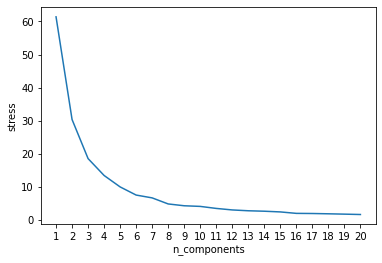

In [77]:
find_optimal_components(x_scaled_std)

In [78]:
npos_std = nmds(x_scaled_std, n_components=4)

Stress:  0.026658656654566827


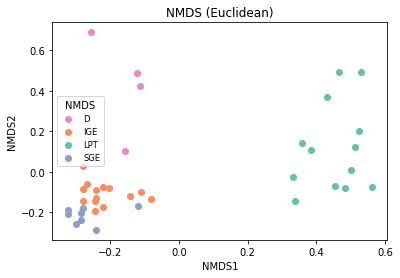

In [339]:
nmds_plot(npos_std, put_names=False)

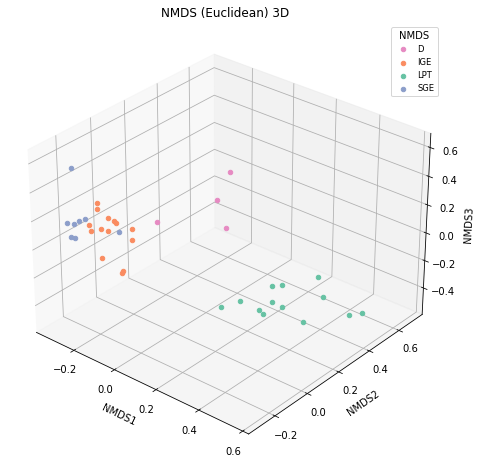

In [189]:
nmds_plot(npos_std, three_dimensional=True, rotation=(None,-50), put_names=False)

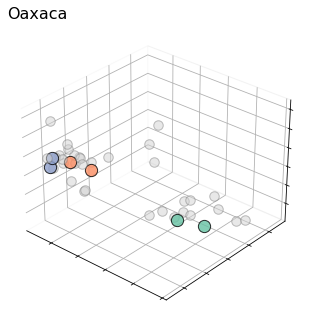

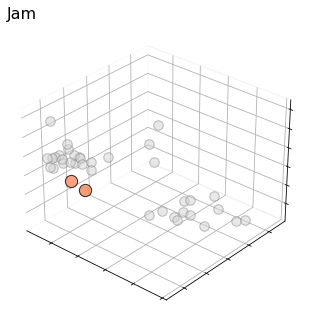

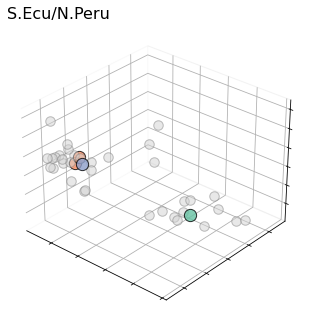

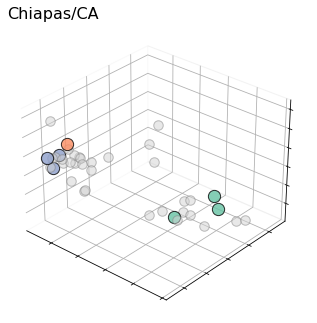

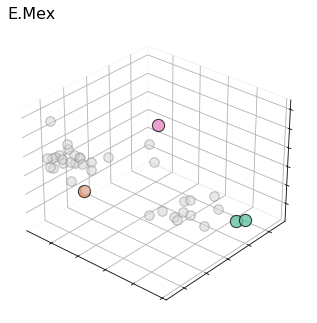

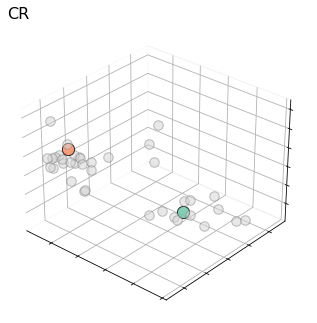

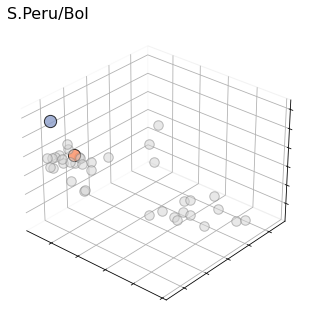

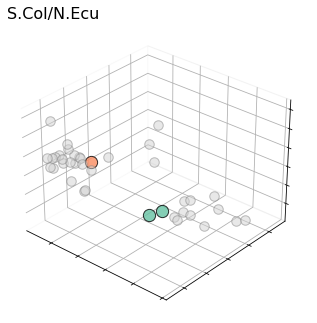

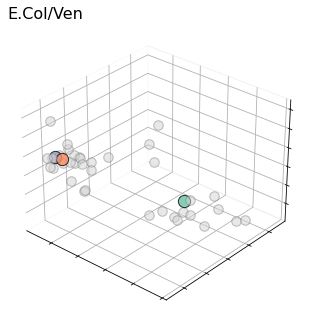

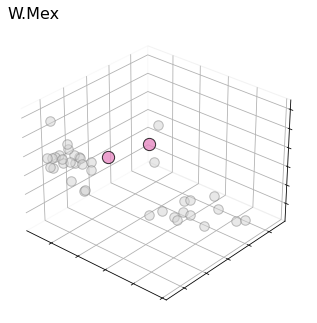

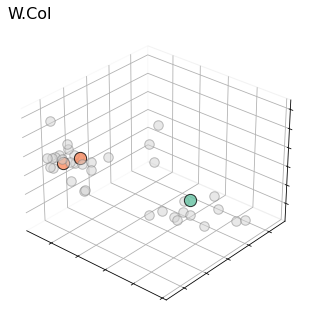

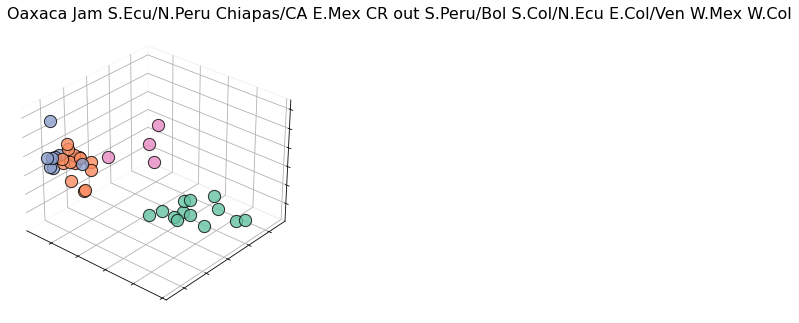

In [317]:
nmds_plot_regions(npos_std, three_dimensional=True, put_names=False, save_svg=True, rotation=(30,-49), size=(2.186*3,1.783*3))

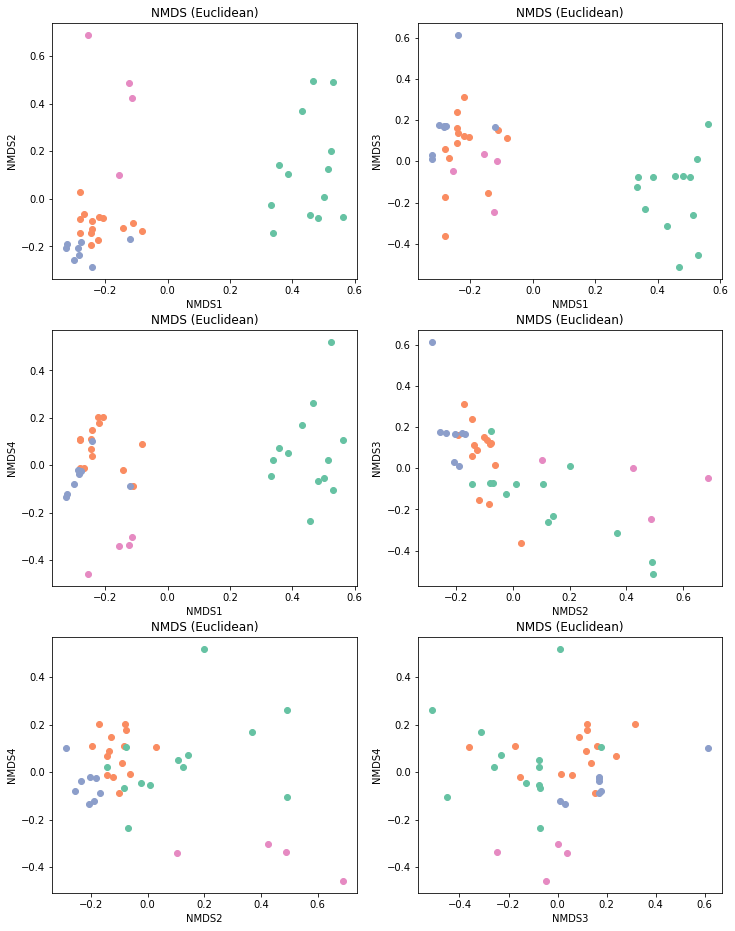

In [406]:
fig = plt.figure(figsize=(12, 16))
for i, comb in enumerate(itertools.combinations([0,1,2,3], r=2)):
    fig.add_subplot(3, 2, i+1)
    nmds_plot(npos_std, put_names=False, save_svg=False, components=comb, three_dimensional=False)
    
fig.show()

#### Clustering

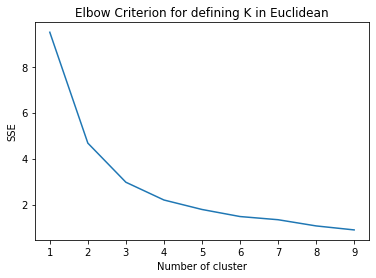

In [80]:
find_optimal_k(npos_std)

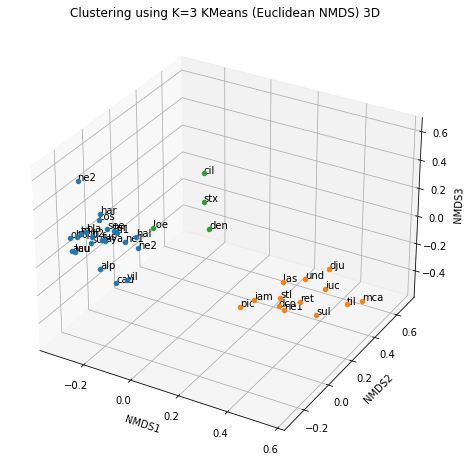

In [97]:
clustering(npos_std, n_clusters=3, three_dimensional=True, put_names=True)

## Check multimodality in big group in NMDS using density plots

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [107]:
from collections import defaultdict

# create empty dict
klusters_imap = defaultdict(list)


# go row by row
for index, row in final_table.iterrows():
    klusters_imap[index] = row["kmeans_nmds_euclidean"]

# klusters_imap

In [110]:
# add a new column with the cluster results
df_raw["kmeans_nmds_euclidean"] = [klusters_imap[r] for r in  df_raw["Species"]]

In [119]:
df_raw.to_csv(f"{NAME}LAST_indvDF_withClusters.csv")

#### The following part is done detailed in R script 
`plot_igesge_mix.R`

In [112]:
# check with cluster is the one that merge SGE and IGE
sge_n_ige_cluster = klusters_imap["acutifolium"]

# create subdf, group 0 is the group that merge SGE and IGE. Also create subdfs for SGE and IGE
group0_df = df_raw[df_raw["kmeans_nmds_euclidean"] == sge_n_ige_cluster]
sge_df = df_raw[df_raw["type"] == "SGE"]
ige_df = df_raw[df_raw["type"] == "IGE"]

names_groups = ["NMDS_mixSnIGE", "SGE", "IGE"]
colors = ["#bcbcbc", "#8c9eca", "#fa8c61"]

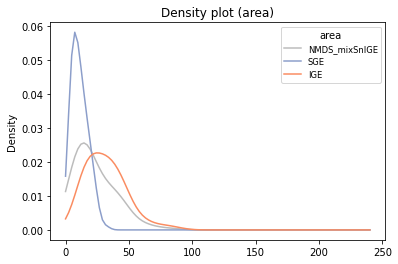

In [115]:
for feature in ["area"]: 
    # feature = "length"
    for i, df_i in enumerate([group0_df,sge_df, ige_df]):
        data = df_i[feature]
        max_point = df_raw[feature].max() + 1
        density = stats.gaussian_kde(data)
        xs = np.linspace(0,max_point,100)
        density.covariance_factor = lambda : .50 #bw
        density._compute_covariance()
        plt.plot(xs,density(xs), label=names_groups[i], c=colors[i])
        plt.legend(title=feature, fontsize="small")
        plt.ylabel("Density")
        plt.title(f"Density plot ({feature})")  

    plt.show()

#### Verification with simple histograms

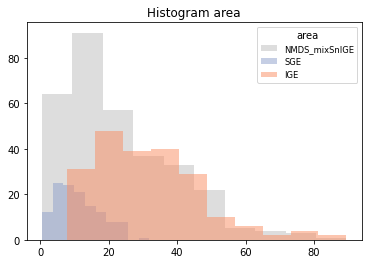

In [117]:
names_groups = ["NMDS_mixSnIGE", "SGE", "IGE"]
colors = ["#bcbcbc", "#8c9eca", "#fa8c61"]

for feature in ["area"]: 
    for i, df_i in enumerate([group0_df,sge_df, ige_df]):
        data = df_i[feature]
        plt.hist(data, alpha=0.5, color=colors[i], label=names_groups[i])
    plt.title(f"Histogram {feature}")
    plt.legend(title=feature, fontsize="small")
    plt.show()

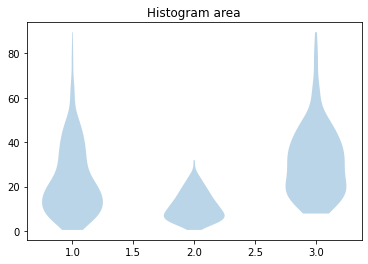

In [118]:
names_groups = ["NMDS_mixSnIGE", "SGE", "IGE"]
colors = ["#bcbcbc", "#8c9eca", "#fa8c61"]

for feature in ["area"]:
    data = []
    for i, df_i in enumerate([group0_df,sge_df, ige_df]):
        data.append(df_i[feature].values)
    
    
    plt.violinplot(data, showextrema=False)
    plt.title(f"Histogram {feature}")
    plt.show()

# Other explorations as confirmation of patterns

## NMDS using Gower distance
Gower distance is a good metric for mixed dataframes (verification of previous result)

In [19]:
import gower

# some globals
NAME = "gower_t4_"
features=['area', 'aspect_ratio', 'T_density', 'trichome_4', 'stellate_hairs_stalked']

# load database
df = pd.read_csv("LAST_leaf_data_means_splvl_Jan2022.csv", sep=",") #global
final_table = pd.DataFrame(columns=["a_priori_group","kmeans_nmds_euclidean"], index=df.loc[:, "Species"].values)

# avoid prepare data step instead prepare data manually

#get features
x = df.loc[:, features].values
#get distance matrix using gower
x_scaled_std = gower.gower_matrix(x, cat_features=[False, False, False, False, True])

In [20]:
npos_std = nmds(x_scaled_std, n_components=4, seed=42, dissimilarity="precomputed")

Stress:  0.282989770192007


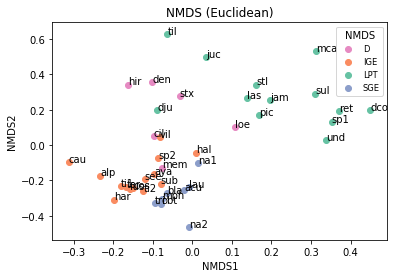

In [21]:
nmds_plot(npos_std)

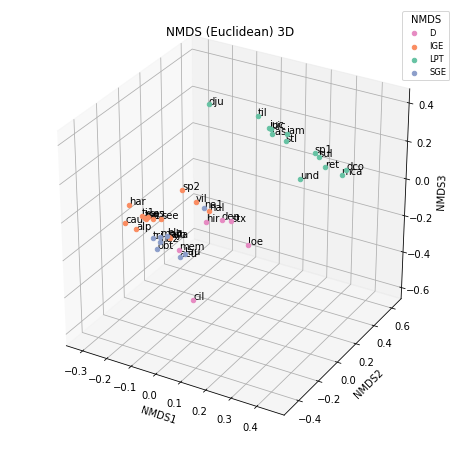

In [22]:
nmds_plot(npos_std, three_dimensional=True)

#### Clustering

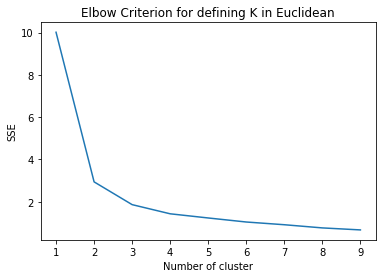

In [23]:
find_optimal_k(npos_std)

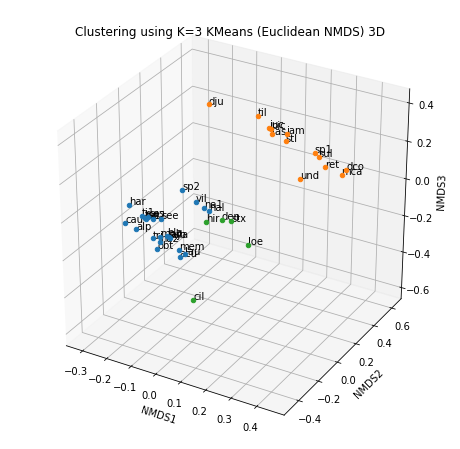

In [25]:
clustering(npos_std, n_clusters=3, three_dimensional=True)

## All individuals - gower

In [132]:
import gower

# some globals
NAME = "gowerIND_t4_"
features=['area', 'aspect_ratio', 'tooth_density', 'trichome_categorical', 'stellate_hairs_stalked']

# load database
df = pd.read_csv("LAST_leaf_data_reduced_January 2022_MJD.csv", sep=",") #global
final_table = pd.DataFrame(columns=["a_priori_group","kmeans_nmds_euclidean"], index=df.loc[:, "Species"].values)
df = df[~(df.Species == 'hirsutum') & ~(df.Species == 'membranaceum')]

# avoid prepare data step instead prepare data manually

#get features
x = df.loc[:, features].values
#get distance matrix using gower
x_scaled_std = gower.gower_matrix(x, cat_features=[False, False, False, False, True])

In [133]:
pca, principalDF = do_pca(features, components=4)

In [134]:
seed = 42
nmds = MDS(
    n_components=4,#defined using previous analysis
    max_iter=100000,
    metric=False, #make mds non-metric
    random_state=seed,
    n_jobs=-1, #use all cores
    dissimilarity="precomputed",
    n_init=1,
)

npos_std = nmds.fit_transform(x_scaled_std, init=principalDF.iloc[:,0:3])

print("Stress: ", nmds.stress_) 


Stress:  147.59983555685216


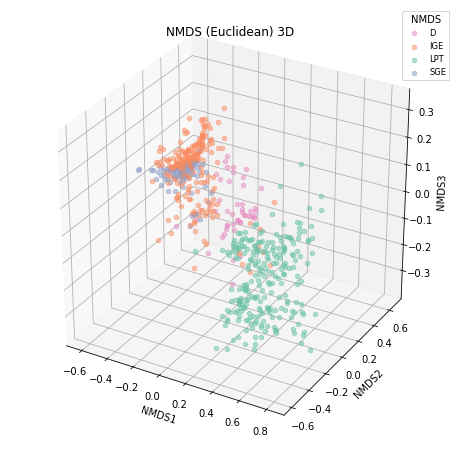

In [135]:
nmds_plot(npos_std, put_names=False, three_dimensional=True, alpha=0.5)

## All individuals - Euclidean

In [136]:
# some globals
NAME = "euclIND_t4_"
features=['area', 'aspect_ratio', 'T_density', 'trichome_4', 'stellate_hairs_stalked']

# load database
df = pd.read_csv("LAST_leaf_data_reduced_January 2022_MJD.csv", sep=",") #global
final_table = pd.DataFrame(columns=["a_priori_group","kmeans_nmds_euclidean"], index=df.loc[:, "Species"].values)
df = df[~(df.Species == 'hirsutum') & ~(df.Species == 'membranaceum')]


x_scaled_std = prepare_data(features)

In [137]:
# run a PCA to have a better guess of intial positions
pca, principalDF = do_pca(features, components=4)

In [138]:
#run NMDS without using initial exploration 
#The amount of points make this very unaccuarate 
# and even with 10K initialization the pattern is almost 
# random

seed = 42
nmds = MDS(
    n_components=4,#defined using previous analysis
    max_iter=100000,
    metric=False, #make mds non-metric
    random_state=seed,
    n_jobs=-1, #use all cores
    dissimilarity="euclidean",
    n_init=1,
)

npos_std = nmds.fit_transform(x_scaled_std, init=principalDF.iloc[:,0:3])

print("Stress: ", nmds.stress_) 


Stress:  164.63365634083377


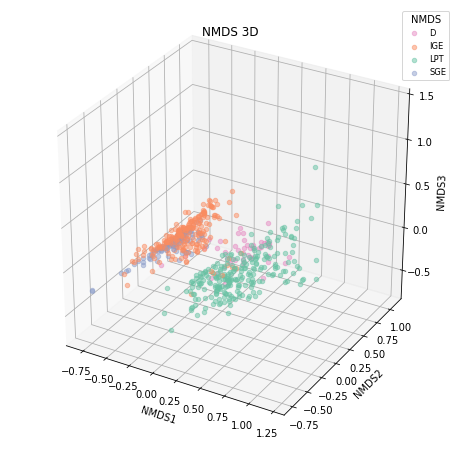

In [147]:
from matplotlib import animation

#plot nmds result
put_names=False
three_dimensional=True
alpha=0.5
# lims=(-0.7,0.86,-0.9,0.9,-0.6,0.85)
save_svg=True
name="LAST_NMDS_colored_expertGroups"
lims=None


categories = df.loc[:, "type"].values
colors = {"LPT": "#66c2a3",
"IGE": "#fa8c61",
"SGE":  "#8c9eca",
"D":  "#e68ac2"}



fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

for i, n in enumerate(np.unique(categories)):
    subset = npos_std[categories == n] #create a mask based on the categories to subset the nmds fit results

    xp = [row[0] for row in subset]
    yp = [row[1] for row in subset]
    zp = [row[2] for row in subset]


    names = df.loc[:, "Species"].values[categories == n]
    for i in range(len(subset)): #plot each point + it's index as text above
        ax.scatter(xp[i],yp[i],zp[i], alpha=alpha, color=colors[n], label=n if i == 0 else "")
        if put_names: 
            ax.text(xp[i],yp[i],zp[i],  unique_sp_name(names[i]), size=10, zorder=1) 

ax.set_xlabel('NMDS1')
ax.set_ylabel('NMDS2')
ax.set_zlabel('NMDS3')

if lims:
    ax.set_xlim(lims[0], lims[1])
    ax.set_ylim(lims[2], lims[3])
    ax.set_zlim(lims[4], lims[5])



plt.legend(title=f"NMDS", fontsize="small")  
plt.title("NMDS 3D")



plt.show()


### CREATE VIDEO

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, frames=360, interval=20, blit=True)
# Save
anim.save('basic_animation_t4.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


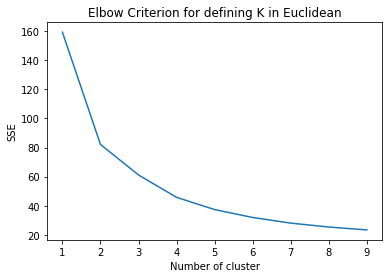

In [144]:
find_optimal_k(npos_std)

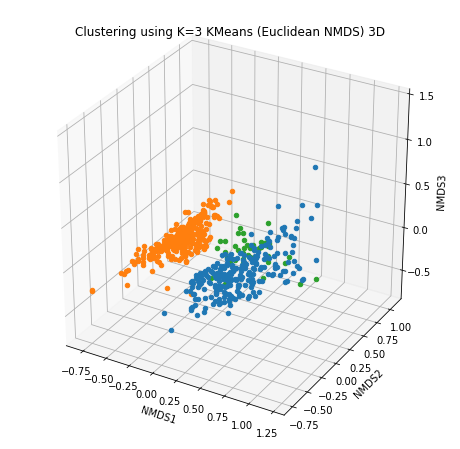

In [146]:
clustering(npos_std, n_clusters=3, three_dimensional=True, put_names=False)